In [1]:
import numpy as np
import pandas as pd

In [7]:
eeg_signals_API = pd.read_csv('mins_eeg_raw.csv', header=None)

In [8]:
eeg_signals_API.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,750000.062,750000.062,331776.875,235555.750,-338640.219,599648.875,-577704.750,750000.062,0.021,0.858,-0.430,0.0,0.0,0.0,93.333,1.0,1.0
1,557366.000,750000.062,164521.547,222355.250,87961.625,98841.742,-69662.078,750000.062,0.020,0.878,-0.452,0.0,0.0,0.0,93.333,2.0,1.0
2,356266.000,661651.812,314962.375,320317.844,655472.875,-106768.477,487464.562,750000.062,0.019,0.882,-0.455,0.0,0.0,0.0,93.333,3.0,1.0
3,299149.406,51772.363,575754.562,495278.750,750000.062,-143912.703,750000.062,487940.031,0.019,0.883,-0.458,0.0,0.0,0.0,93.333,4.0,1.0
4,368593.531,-276922.406,640338.000,741528.375,750000.062,113024.555,750000.062,16026.470,0.020,0.883,-0.460,0.0,0.0,0.0,93.333,5.0,1.0


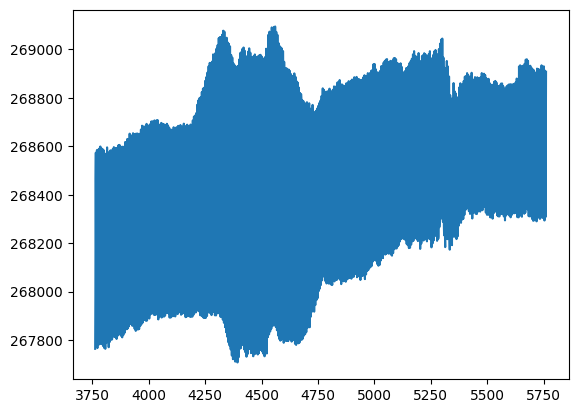

In [9]:
import matplotlib.pyplot as plt

first_event = 4762

# plt.plot(eeg_signals['EEG 1'][10000:11000])
plt.plot(eeg_signals_API[range(8)][first_event-1000:first_event+1000][0])

## `SciPy` Filters (Failed)

In [ ]:
from scipy import signal


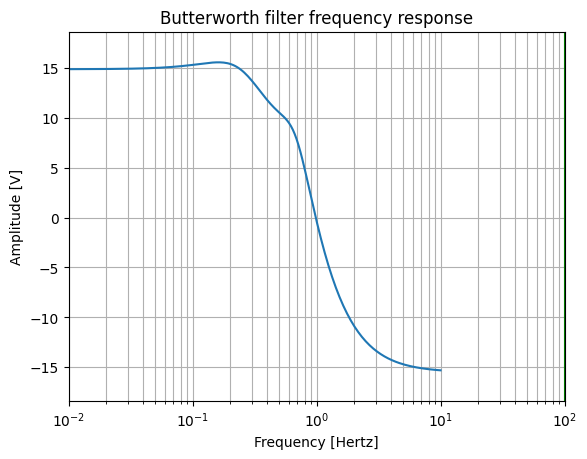

In [ ]:
b, a = signal.butter(4, 50, 'hp', analog=False, fs=250)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hertz]')
plt.ylabel('Amplitude [V]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

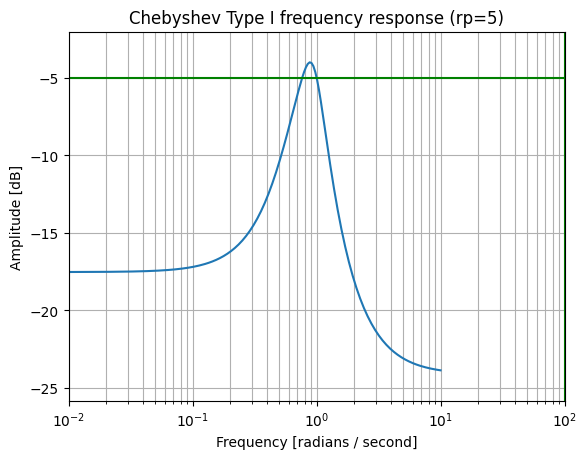

In [ ]:
b, a = signal.cheby1(4, 5, 50, 'hp', analog=False, fs=250)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()



(45000, 8)


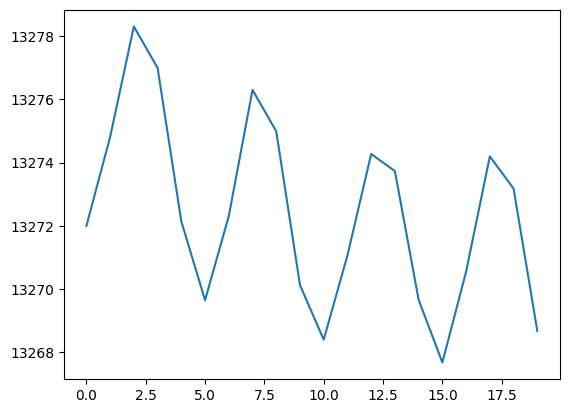

In [ ]:
sos = signal.butter(4, 50, 'lp', analog=False, fs=250, output='sos')
filtered = signal.sosfilt(sos, eeg_signals_API[range(8)])
print(filtered.shape)
plt.plot(filtered[:,0:1][first_event-10:first_event+10])
# plt.set_title('After 15 Hz high-pass filter')
# plt.axis([0, 1, -2, 2])
# plt.set_xlabel('Time [seconds]')
# plt.tight_layout()
plt.show()


In [ ]:
sos = signal.cheby1(4, 5, (2,30), 'bandpass', analog=False, fs=250, output='sos')
filtered = signal.sosfilt(sos, eeg_signals[range(8)])
print(filtered.shape)
plt.plot(filtered[:,0:1][12000:13000])
# plt.set_title('After 15 Hz high-pass filter')
# plt.axis([0, 1, -2, 2])
# plt.set_xlabel('Time [seconds]')
# plt.tight_layout()
plt.show()


NameError: name 'eeg_signals' is not defined

## Get Braking Indices

In [10]:
braking_events = pd.read_csv('mins_braking_events.csv', header=None)

In [11]:
braking_events.head()

,0,1
0,1714399485766495600,1
1,1714399511242562500,1
2,1714399523864560500,1
3,1714399536909636000,1
4,1714399550144639100,1


In [12]:
eeg_start = pd.read_csv('mins_eeg_raw_first_timestamp.csv')

eeg_start

,1714399431472006700


In [13]:
start = float(list(eeg_start)[0])

start

1.7143994314720067e+18

In [14]:
sfreq = 250

In [15]:
braking_indices = ((braking_events - start) * sfreq).astype(int).to_numpy()
print(braking_indices.shape)

(58, 2)


In [16]:
rnd_index = braking_indices[np.random.randint(0, len(braking_indices))][0]

print(rnd_index)
rnd_braking_event = eeg_signals_API[-300+rnd_index: 300+rnd_index][range(8)]
print(rnd_braking_event.shape)

-2147483648
(0, 8)


C:\Users\G7\AppData\Local\Temp\ipykernel_22816\1155414175.py:4: RuntimeWarning: overflow encountered in scalar add
  rnd_braking_event = eeg_signals_API[-300+rnd_index: 300+rnd_index][range(8)]


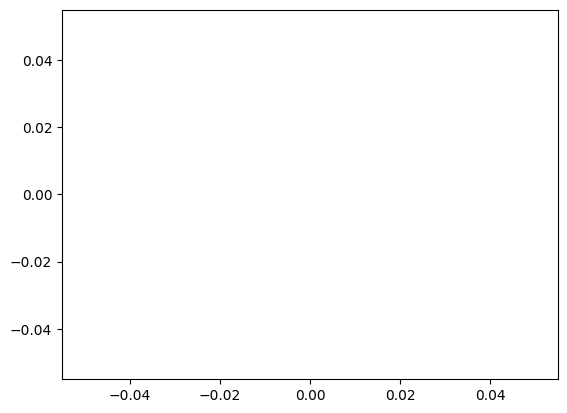

In [18]:
import matplotlib.pyplot as plt

# print(rnd_braking_event[7].values)
plt.plot(rnd_braking_event[0])

## CAR Filter (Failed)

In [ ]:
eeg_signals = eeg_signals[range(8)]
eeg_signals.shape

NameError: name 'eeg_signals' is not defined

In [ ]:
car_eeg = np.mean(eeg_signals,axis=1)

car_eeg.shape

eeg_new = eeg_signals.to_numpy() - np.array(car_eeg)[:, np.newaxis]

eeg_new.shape

NameError: name 'eeg_signals' is not defined

In [ ]:
eeg_avg = eeg_signals.mean(axis=1).to_numpy()  # average over all channels
print(eeg_avg.shape)

NameError: name 'eeg_signals' is not defined

In [ ]:
eeg_signals_numpy = eeg_signals.to_numpy()
print(eeg_signals_numpy.shape)

NameError: name 'eeg_signals' is not defined

In [ ]:
eeg_signals_numpy.shape

NameError: name 'eeg_signals_numpy' is not defined

In [ ]:
car_repeat = np.repeat(eeg_avg[:, np.newaxis], 8, axis=1)

NameError: name 'eeg_avg' is not defined

In [ ]:
eeg_new = eeg_signals_numpy - car_repeat
print(eeg_new.shape)
# plt.plot(eeg_signals_numpy)

NameError: name 'eeg_signals_numpy' is not defined

In [ ]:
rnd_car_index = 50 * np.random.randint(0, int(len(braking_indices)/50))

rnd_braking_event = eeg_new[-300+rnd_car_index: 300+rnd_car_index][range(0, 8)]

ValueError: high <= 0

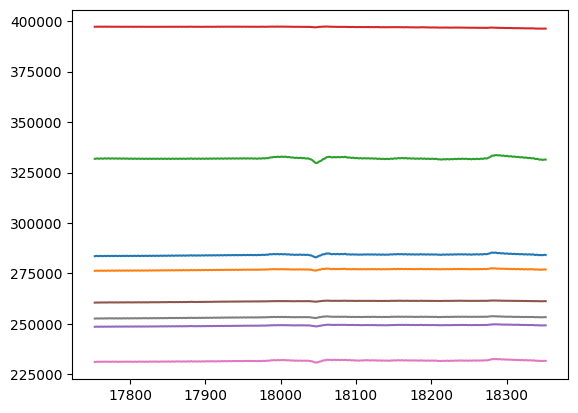

In [ ]:
def plot_braking_event_(rnd_braking_event):
    for i in range(8):
        plt.plot(rnd_braking_event[i], label='channel %d' % i)


# plt.plot(rnd_braking_event[7])

plot_braking_event_(rnd_braking_event)

## MNE Trial (Failed)

In [ ]:
import mne

In [ ]:
# Definition of channel types and names.
ch_types = ['eeg']*8
ch_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)


In [ ]:
eeg_signals_numpy = eeg_signals_API.T.to_numpy()[range(8)].T
print(eeg_signals_numpy.shape)

(45000, 8)


Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Using matplotlib as 2D backend.


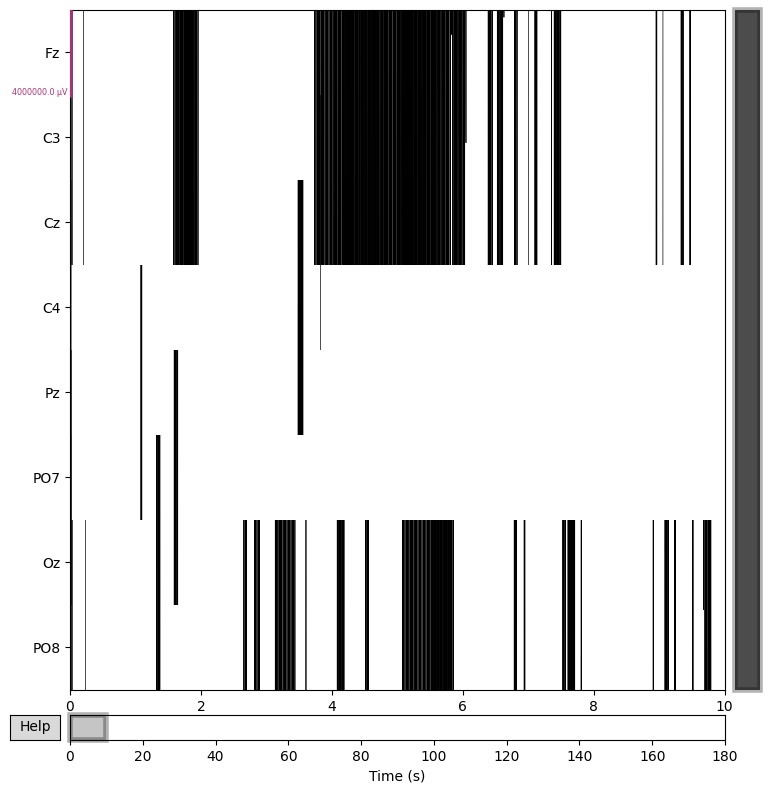

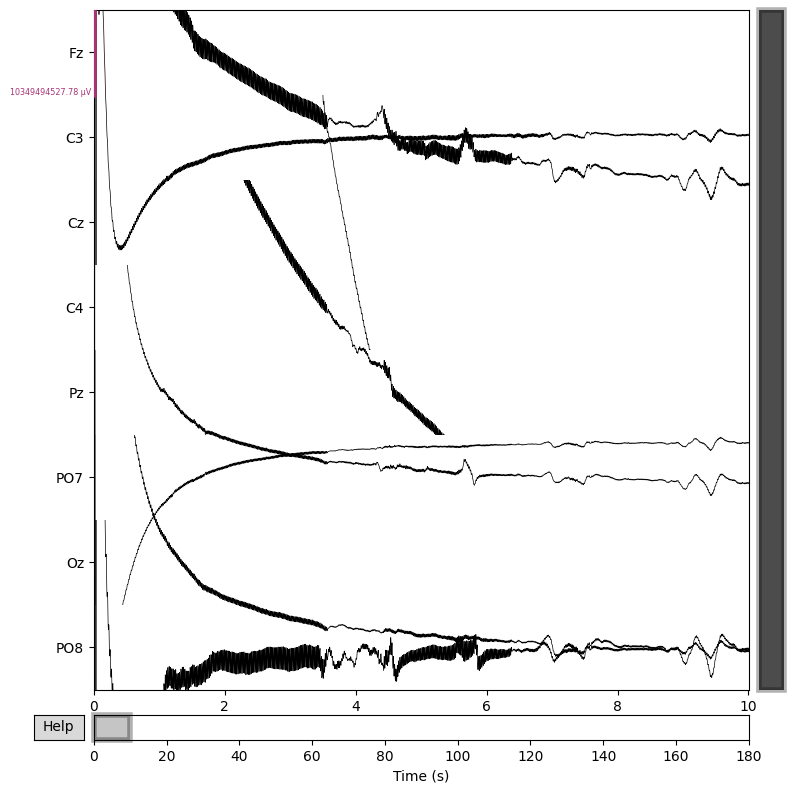

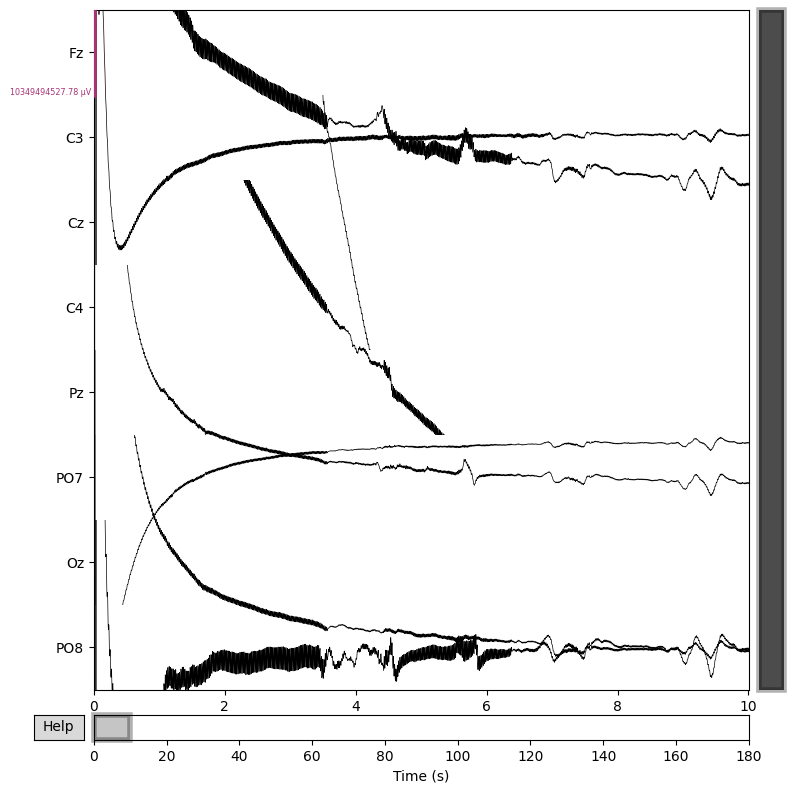

In [ ]:
data = eeg_signals_numpy.T
raw = mne.io.RawArray(data, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
scalings = {'eeg': 2,}

raw.plot(n_channels=8, scalings=scalings, title='Data from arrays',
         show=True, block=True)

# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=8, scalings='auto', title='Auto-scaled Data from arrays',
         show=True, block=True)

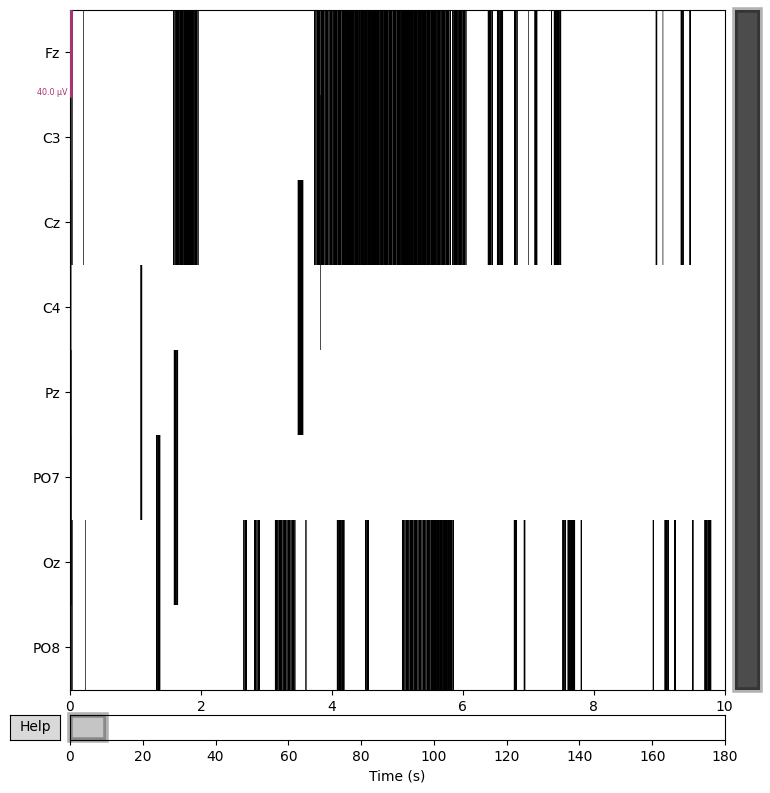

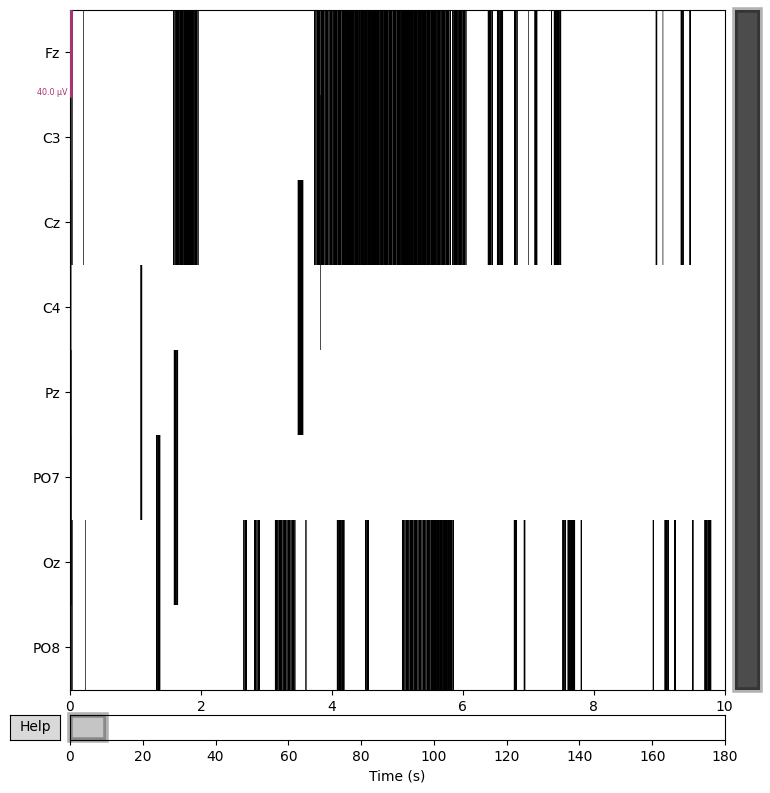

In [ ]:
raw.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


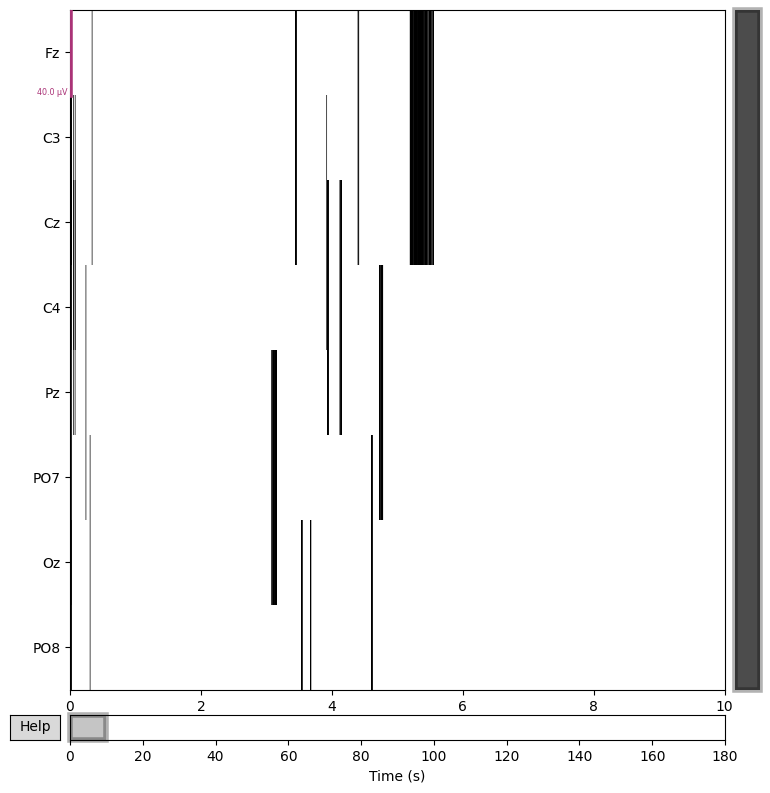

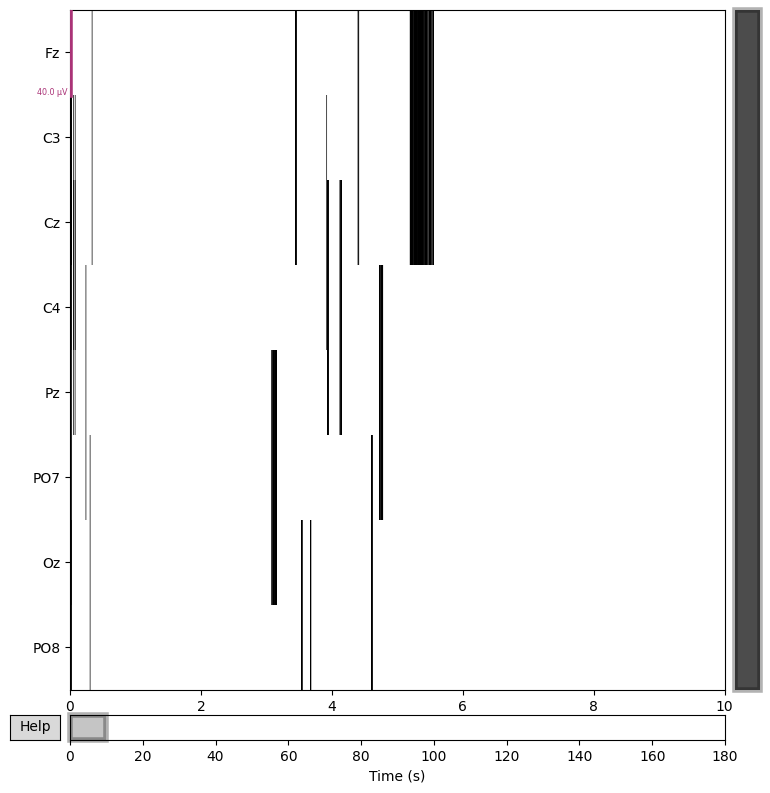

In [ ]:
# use the average of all channels as reference
raw_avg_ref = raw.copy().set_eeg_reference(ref_channels='average')
raw_avg_ref.plot()

## Chebyshev Filter

In [ ]:
import numpy as np
from scipy.signal import cheby2, freqz, lfilter
import matplotlib.pyplot as plt


In [ ]:
order = 10 # Order of the filter
rp = 100 # Pass band ripple in dB
rs = 0.01 # Stop band attenuation in dB
cutoff_freq = 0.2 # Cutoff frequency, normalized from 0 to 1 (where 1 is the Nyquist frequency)


In [ ]:
b, a = cheby2(order, rs, cutoff_freq, btype='low', analog=False, output='ba', fs=sfreq)


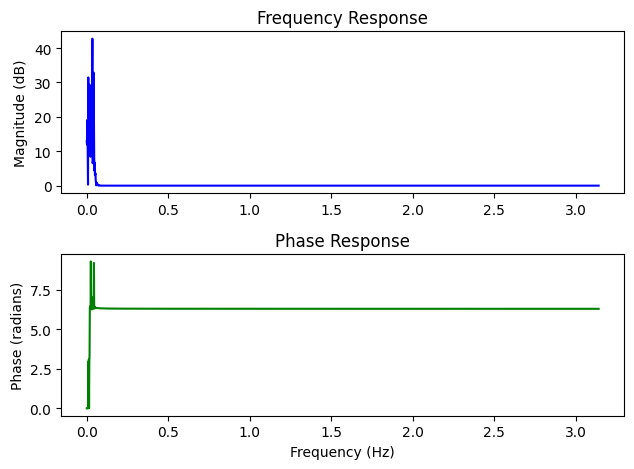

In [ ]:
# Compute the frequency response
w, h = freqz(b, a, worN=2000)

# Plot the magnitude and phase response
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response')

plt.subplot(2, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)), 'g')
plt.ylabel('Phase (radians)')
plt.xlabel('Frequency (Hz)')
plt.title('Phase Response')

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (300,) and (600,)

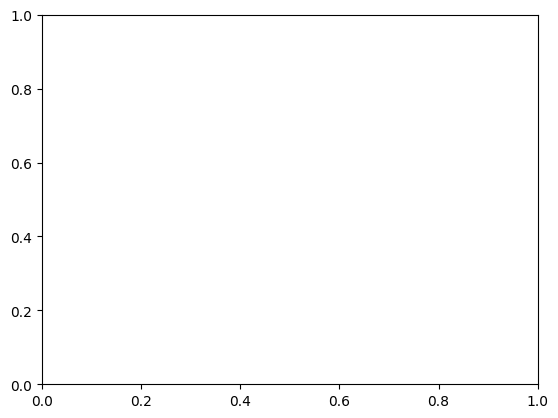

In [ ]:
# Example data
t = np.linspace(0, 1, 300, False) # Time vector
# data = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, t.size) # Example signal with added noise
data = rnd_braking_event[7].values
# Apply the filter
filtered_data = lfilter(b, a, data)

# Plot the original and filtered data
plt.figure()
plt.plot(t, data, label='Original')
plt.plot(t, filtered_data, label='Filtered')
plt.legend()
plt.show()


## MNE Filter

In [19]:
import mne

In [20]:
eeg_signals_numpy = eeg_signals_API.to_numpy()
eeg_signals_numpy = eeg_signals_numpy[:,range(8)]
eeg_signals_numpy = eeg_signals_numpy.T
print(eeg_signals_numpy.shape)

(8, 240000)


In [21]:
# Definition of channel types and names.
ch_types = ['eeg'] * 8
ch_names = ['Fz','C3','Cz','C4','Pz','PO7','Oz', 'PO8']

In [22]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

In [23]:
raw = mne.io.RawArray(eeg_signals_numpy, info)

Creating RawArray with float64 data, n_channels=8, n_times=240000
    Range : 0 ... 239999 =      0.000 ...   959.996 secs
Ready.


Using matplotlib as 2D backend.


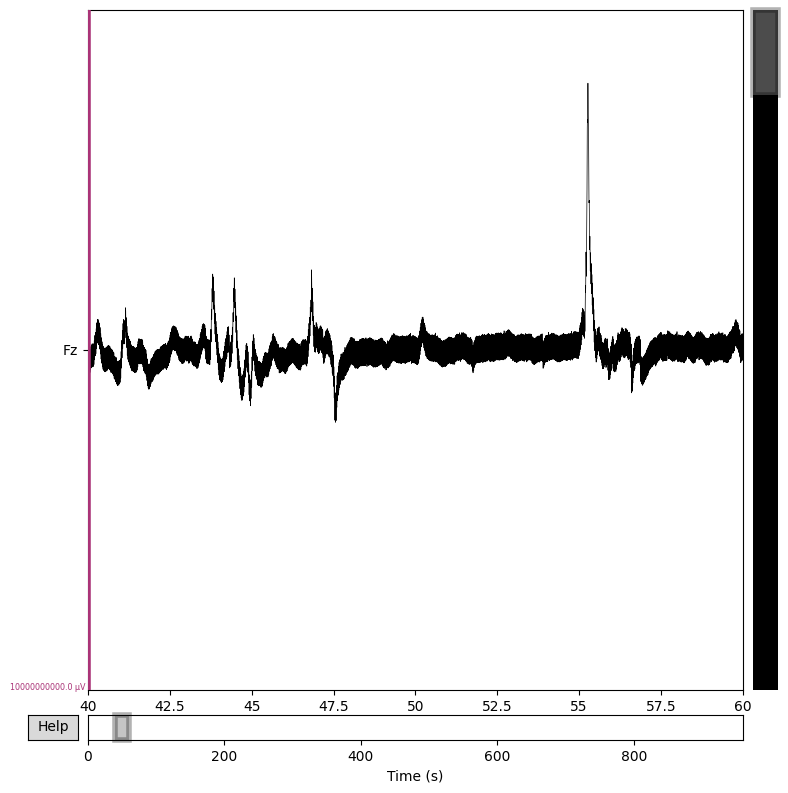

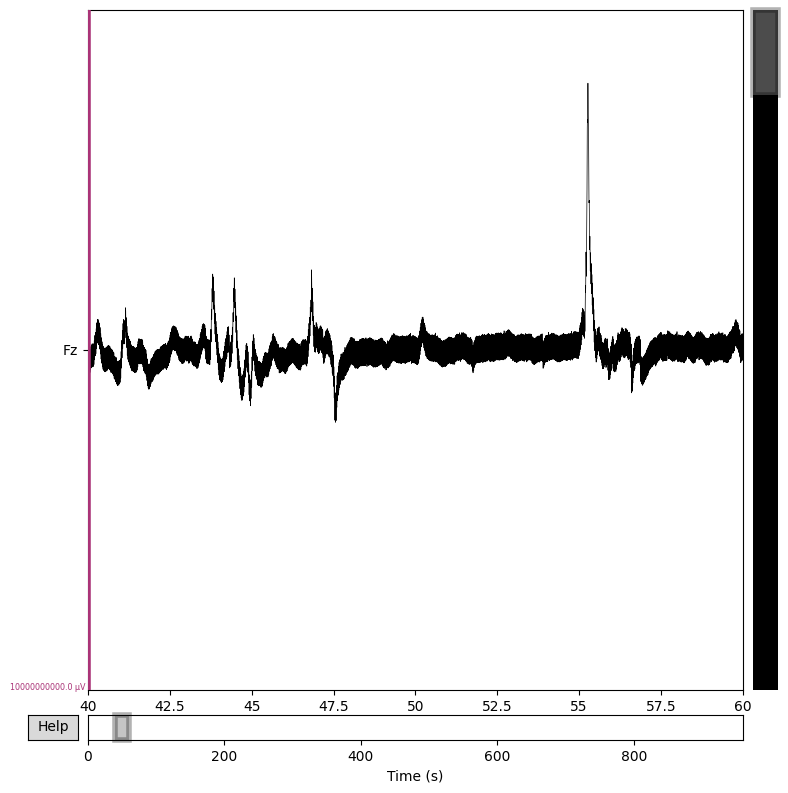

In [24]:
scalings={'eeg':5e3}
raw.plot(n_channels=1, scalings=scalings, title='Data from arrays', start=40, duration=20,
         show=True, block=True, remove_dc=True)


In [25]:
eeg_signals_numpy_bandpass = mne.filter.filter_data(eeg_signals_numpy, sfreq, l_freq=2, h_freq=30, filter_length='auto')

Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



(8, 240000)


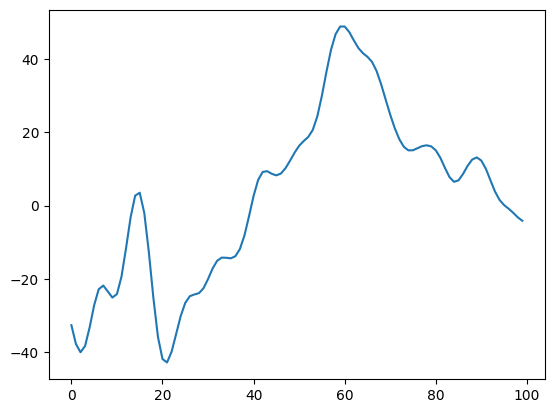

In [26]:
print(eeg_signals_numpy_bandpass.shape)
plt.plot(eeg_signals_numpy_bandpass.T[first_event-50:first_event+50,0:1])

In [27]:
raw = mne.io.RawArray(eeg_signals_numpy_bandpass, info)

Creating RawArray with float64 data, n_channels=8, n_times=240000
    Range : 0 ... 239999 =      0.000 ...   959.996 secs
Ready.


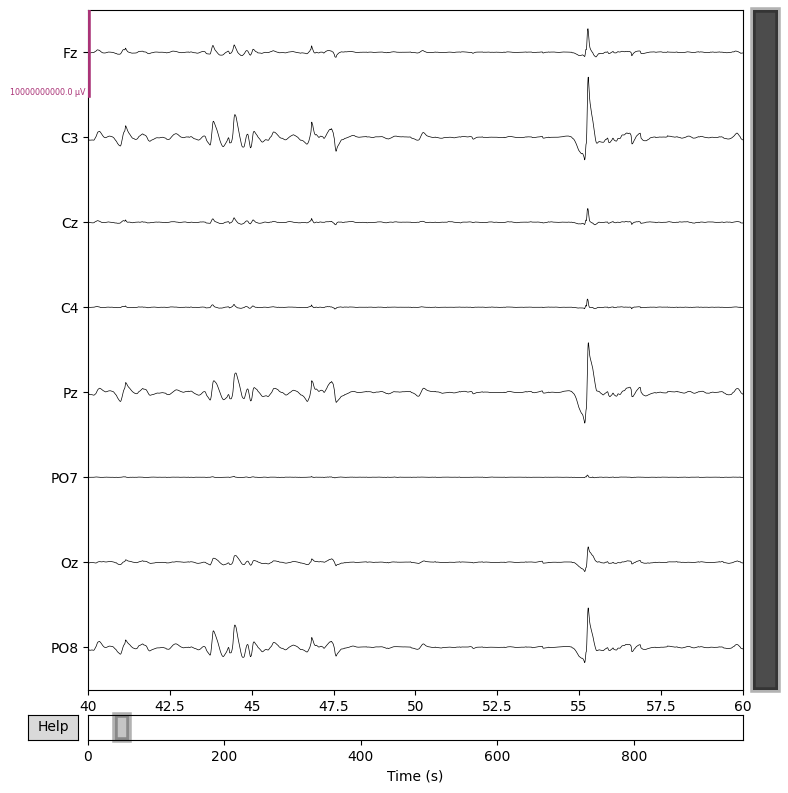

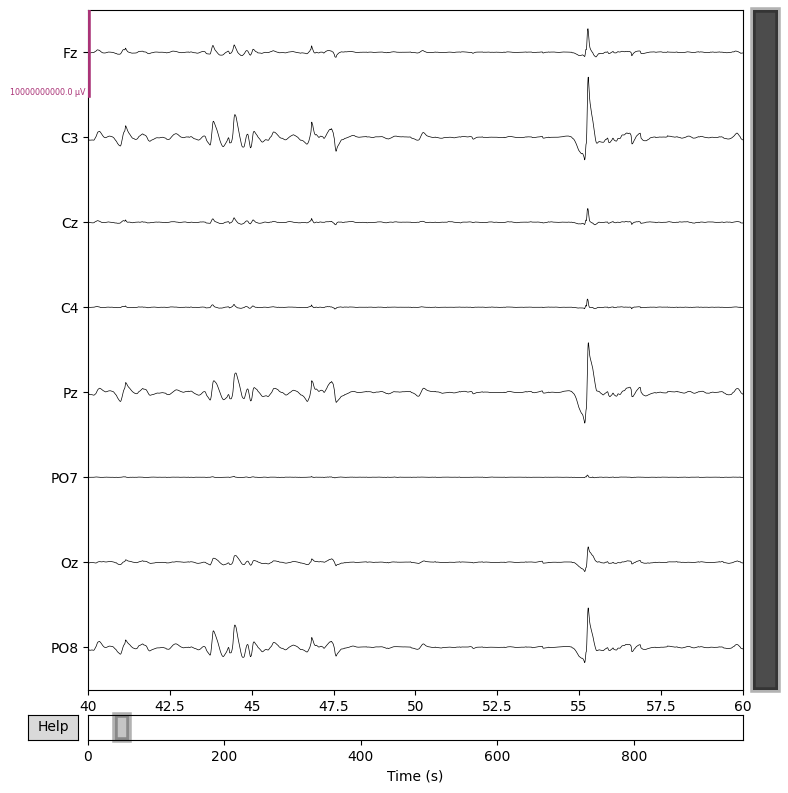

In [28]:
scalings={'eeg':5e3}
raw.plot(n_channels=8, scalings=scalings, title='Data from arrays', start=40, duration=20,
         show=True, block=True, remove_dc=True)

In [29]:
eeg_signals_numpy_bandpass_notch = mne.filter.filter_data(eeg_signals_numpy_bandpass, sfreq, l_freq=None, h_freq=50, filter_length='auto')

Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 67 samples (0.268 s)



(8, 240000)


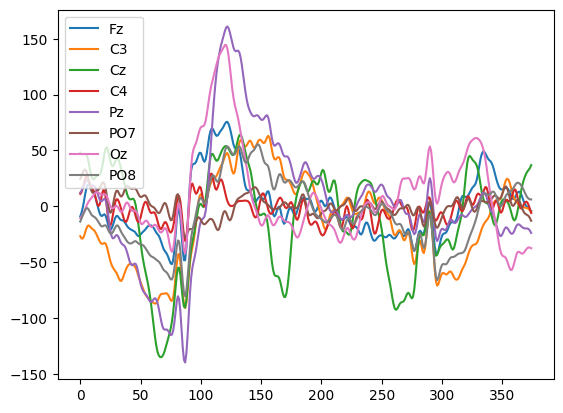

In [30]:
print(eeg_signals_numpy_bandpass_notch.shape)
plt.plot(eeg_signals_numpy_bandpass_notch.T[first_event-325:first_event+50,0:])
plt.legend(ch_names)


In [31]:
raw = mne.io.RawArray(eeg_signals_numpy_bandpass_notch, info)

Creating RawArray with float64 data, n_channels=8, n_times=240000
    Range : 0 ... 239999 =      0.000 ...   959.996 secs
Ready.


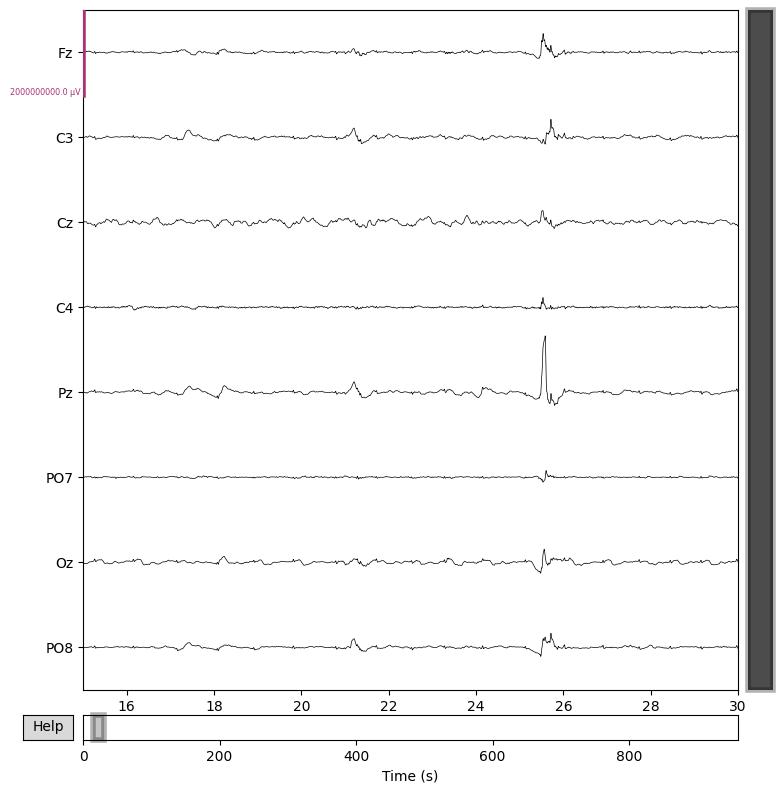

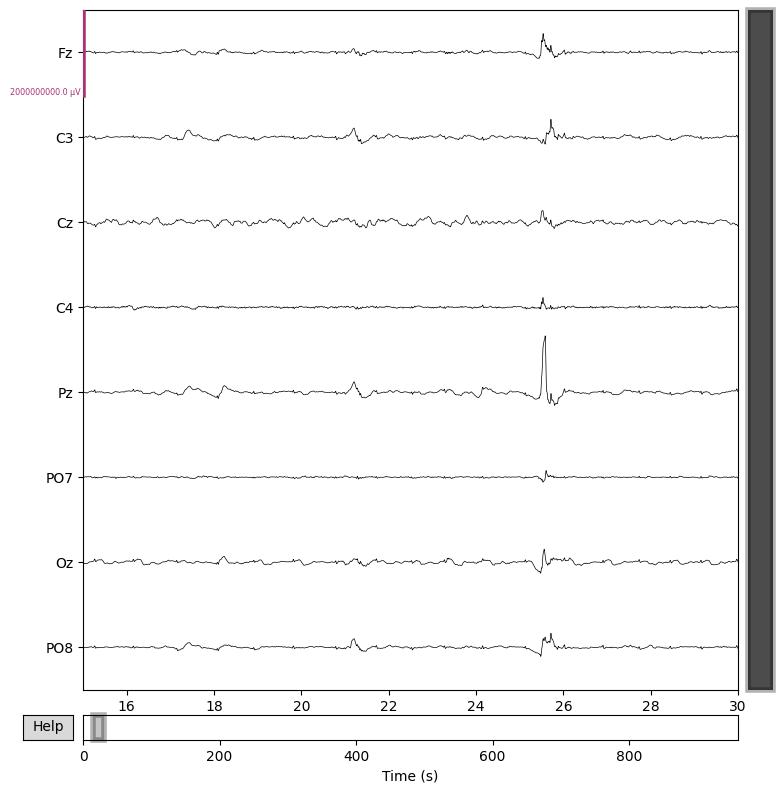

In [32]:
scalings={'eeg':1e3}
raw.plot(n_channels=8, scalings=scalings, title='Data from arrays', start=15, duration=15,
         show=True, block=True, remove_dc=True)

In [33]:
eeg_signals_numpy_bandpass_notch_mean = np.mean(eeg_signals_numpy_bandpass_notch.T, axis=1)
print(eeg_signals_numpy_bandpass_notch_mean.shape)

(240000,)


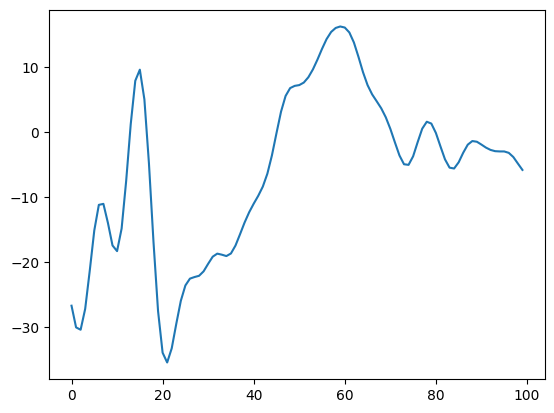

In [34]:
plt.plot(eeg_signals_numpy_bandpass_notch_mean[first_event-50:first_event+50])

In [35]:
eeg_signals_numpy_bandpass_notch_car = eeg_signals_numpy_bandpass_notch.T - eeg_signals_numpy_bandpass_notch_mean[:, np.newaxis]
print(eeg_signals_numpy_bandpass_notch_car.shape)

(240000, 8)


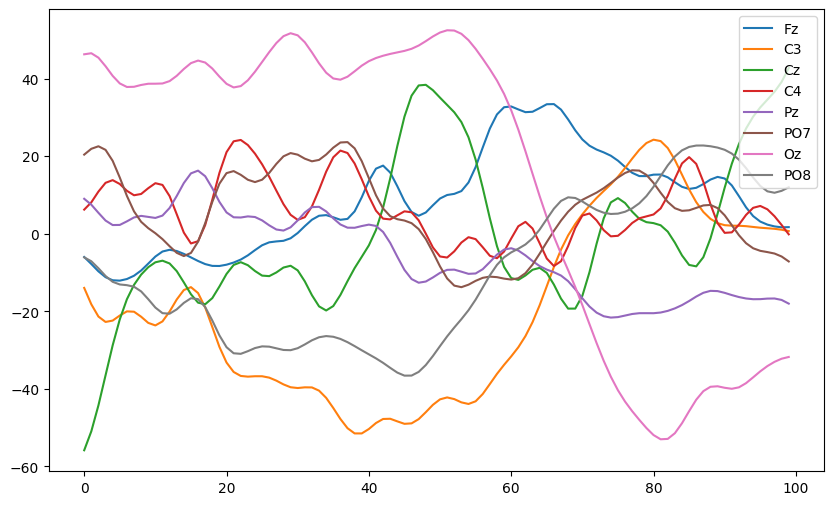

In [36]:
plt.figure(figsize=(10,6))
plt.plot(eeg_signals_numpy_bandpass_notch_car[first_event-50:first_event+50])
plt.legend(ch_names)

In [37]:
raw = mne.io.RawArray(eeg_signals_numpy_bandpass_notch_car.T, info)

Creating RawArray with float64 data, n_channels=8, n_times=240000
    Range : 0 ... 239999 =      0.000 ...   959.996 secs
Ready.


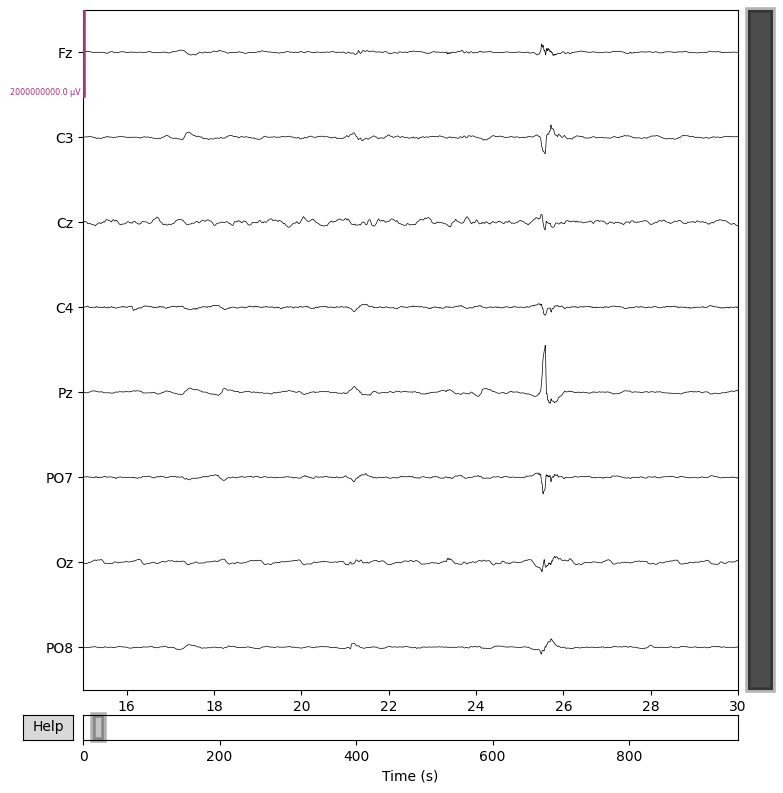

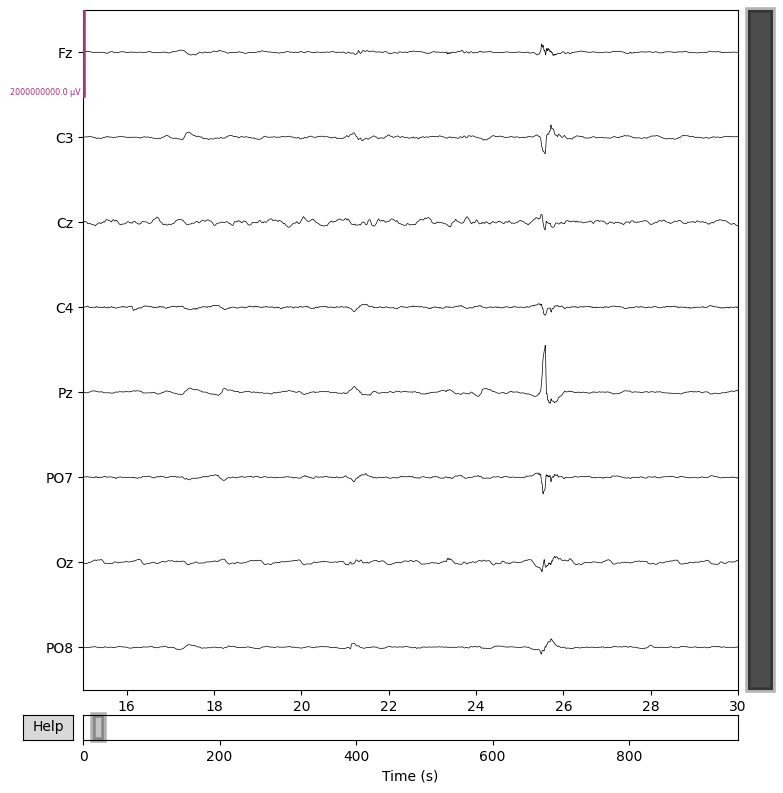

In [38]:
scalings={'eeg':1e3}
raw.plot(n_channels=8, scalings=scalings, title='Data from arrays', start=15, duration=15,
         show=True, block=True, remove_dc=True)

In [39]:
Y = []
event_indices = []
# non_braking_indices = [int((a + b)/2) for a, b in zip(braking_indices[:-1], braking_indices[1:])]
for a, b in zip(braking_indices[:-1], braking_indices[1:]):
    event_indices.append(a[0])
    Y.append([0, 1])

    event_indices.append(int((a[0] + b[0])/2))
    Y.append([1, 0])

event_indices.append(braking_indices[-1][0])
Y.append([0, 1])


Y = np.array(Y)
event_indices = np.array(event_indices)
print(Y.shape)
print(event_indices.shape)

(115, 2)
(115,)


C:\Users\G7\AppData\Local\Temp\ipykernel_22816\4204740013.py:8: RuntimeWarning: overflow encountered in scalar add
  event_indices.append(int((a[0] + b[0])/2))


In [40]:
print(event_indices[0:5])

[-2147483648           0 -2147483648           0 -2147483648]


In [41]:
# Y = np.rollaxis(Y, 1, 0)
print(Y[0:5])
print(Y.shape)

[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]
(115, 2)


In [42]:
loc, ind = np.where(Y>0)
np.unique(ind)

array([0, 1], dtype=int64)

In [43]:
#create labels
labels  = ind + 1
print(labels[0:5])
print(labels.shape)

[2 1 2 1 2]
(115,)


In [44]:
event_id = dict(car_normal = 1, car_brake = 2)

eventLength = Y.shape[0]
ev = np.array(event_indices)

In [46]:
print(Y[-1])

[0 1]


In [47]:
events = np.column_stack((np.array(ev),
                        np.zeros(eventLength,  dtype = int),
                        np.array(labels)))


In [48]:
print(events.shape)

(115, 3)


In [49]:
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


In [50]:
raw_eeg = mne.io.RawArray(eeg_signals_numpy_bandpass_notch_car.T,info, verbose=True)


Creating RawArray with float64 data, n_channels=8, n_times=240000
    Range : 0 ... 239999 =      0.000 ...   959.996 secs
Ready.


In [51]:
print(raw_eeg.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


In [56]:

# epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-1.7, tmax=1.2, preload=True, event_repeated='drop', verbose=True)
epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-0.3, tmax=1.2, preload=True, verbose=True)
print(epochs.info)

RuntimeError: Event time samples were not unique. Consider setting the `event_repeated` parameter."

In [54]:
epochs.ch_names

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

In [55]:
epochs['car_brake'].average()

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [50]:
epochs.events.shape

(66, 3)

In [51]:
cnr = epochs["car_normal"].average()#.pick_channels(["FT8"]).average()
cnr1 = epochs["car_normal"].pick_channels(["Oz"]).average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


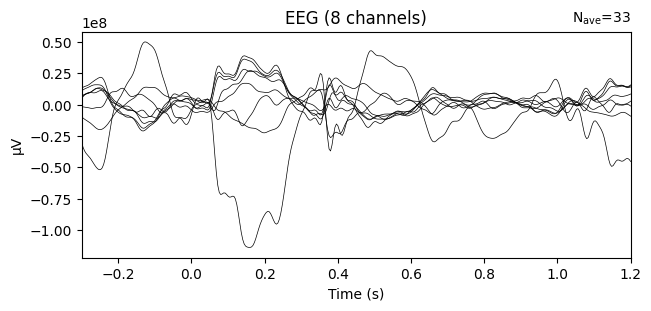

Need more than one channel to make topography for eeg. Disabling interactivity.


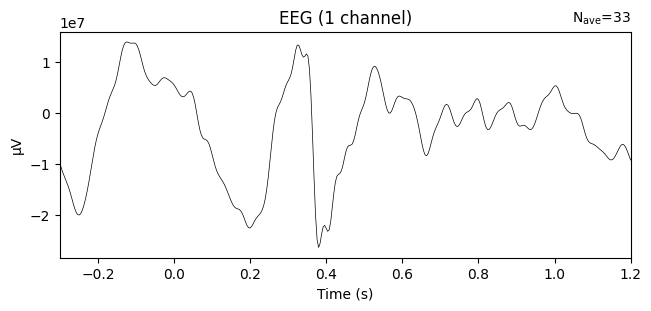

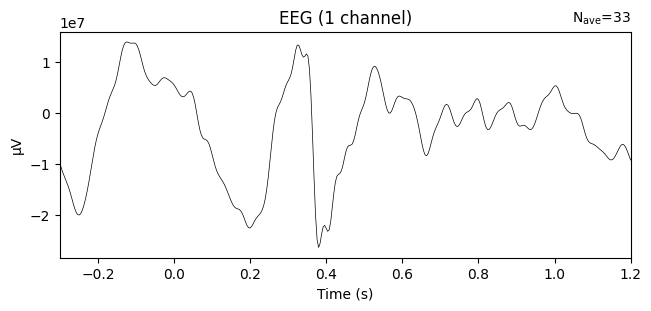

In [52]:
cnr.plot()
cnr1.plot()

In [53]:
cbr = epochs["car_brake"].average()#.pick_channels(["FT8"]).average()
cbr1 = epochs["car_brake"].pick_channels(["PO8"]).average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


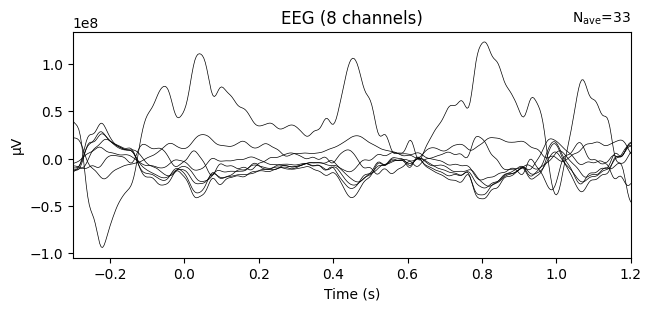

Need more than one channel to make topography for eeg. Disabling interactivity.


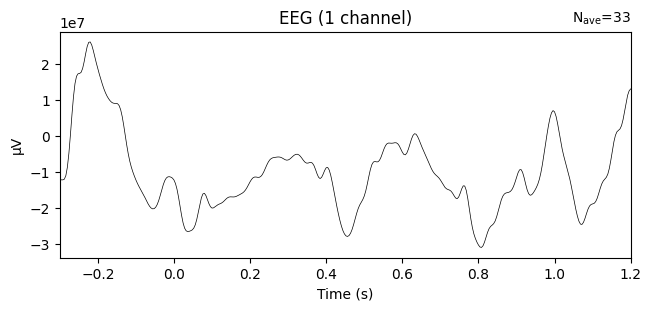

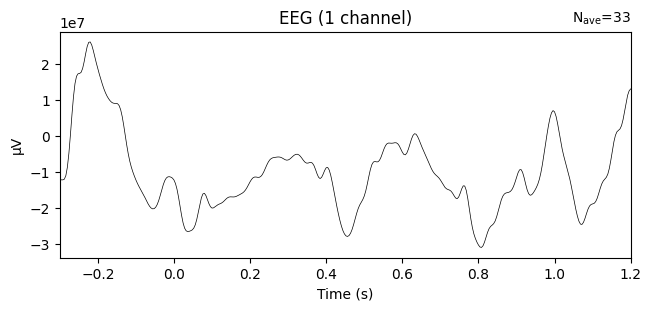

In [54]:
cbr.plot()
cbr1.plot()

In [55]:
FL = epochs["car_normal"].get_data()
TR = epochs["car_brake"].get_data()

print(FL.shape)

(33, 8, 376)


C:\Users\G7\AppData\Local\Temp\ipykernel_23984\1091438706.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  FL = epochs["car_normal"].get_data()
C:\Users\G7\AppData\Local\Temp\ipykernel_23984\1091438706.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  TR = epochs["car_brake"].get_data()


In [56]:
TrueLabels = [1 for _ in range(TR.shape[0])]
FalseLabels = [0 for _ in range(FL.shape[0])]

In [110]:
from sklearn.model_selection import train_test_split

X = np.concatenate((TR, FL))
y = np.concatenate((TrueLabels, FalseLabels))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)

(52, 8, 376)


In [111]:
import pywt

cA, cD = pywt.dwt(X_train, 'coif1')
cA2, cD2 = pywt.dwt(X_test, 'coif1')

print(cA.shape)

X_train = cA
X_test = cA2

(52, 8, 190)


In [57]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,roc_auc_score,f1_score, accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb


X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# pipe = Pipeline([('pca', PCA()), ('svm', SVC(probability=True))])
# pipe = Pipeline([('lda', LDA())])
# pipe = Pipeline([('pca', PCA()), ('GBoost', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0))])
pipe = Pipeline([('pca', PCA()), ('RandomForest', RandomForestClassifier(max_depth=2, random_state=0))])
# pipe = Pipeline([('pca', PCA()), ('LGBM', lgb.LGBMClassifier())])
pipe.fit(X_train_flat, y_train)

ys_pred = pipe.predict(X_test_flat)

ConfusionMatrixDisplay.from_predictions(y_test, ys_pred)
acc = accuracy_score(y_test, ys_pred)
ys_pred_proba = pipe.predict_proba(X_test_flat)[:, 1]
auc_score = roc_auc_score(y_test, ys_pred_proba)
f1 = f1_score(y_test, ys_pred)

print(f"Accuracy: {acc:.2f}")
print(f"AUC: {auc_score:.2f}")
print(f"F1: {f1:.2f}")

NameError: name 'X_train' is not defined

In [ ]:
import joblib

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(pipe, filename)

['finalized_model.sav']

In [ ]:
import pickle

pickle.dump(pipe, open('eeg_model.pkl', 'wb'))
import

In [ ]:
import sklearn

print(sklearn.__version__)

1.2.2


In [3]:
# Authors: Alexandre Barachant <alexandre.barachant@gmail.com>
#
# License: BSD (3-clause)

import numpy as np

from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace

import mne
from mne import io
from mne.datasets import sample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

from matplotlib import pyplot as plt

print(__doc__)

Automatically created module for IPython interactive environment


In [ ]:
n_components = 2  # pick some components

# Define a monte-carlo cross-validation generator (reduce variance):
cv = KFold(n_splits=10, shuffle=True, random_state=42)

clf = make_pipeline(
    XdawnCovariances(n_components, estimator='oas'),
    TangentSpace(metric="riemann"),
    LogisticRegression(),
)

preds = np.zeros(len(labels))
epochs_data = epochs.get_data(copy=False)

for train_idx, test_idx in cv.split(epochs_data):
    y_train, y_test = labels[train_idx], labels[test_idx]

    clf.fit(epochs_data[train_idx], y_train)
    preds[test_idx] = clf.predict(epochs_data[test_idx])

# Printing the results
acc = np.mean(preds == labels)
print("Classification accuracy: %f " % (acc))

names = ["Car Normal", "Car Braking"]
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=names).plot()
plt.show()

LinAlgError: The leading minor of order 8 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.